In [2]:
import pandas as pd
t = pd.read_csv('../data/test_set_metadata.csv')

In [11]:
import seaborn as sns
import numpy as np
ta = pd.read_csv('../data/training_set_metadata.csv')

/Users/miguelrita/anaconda2/envs/titanic/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


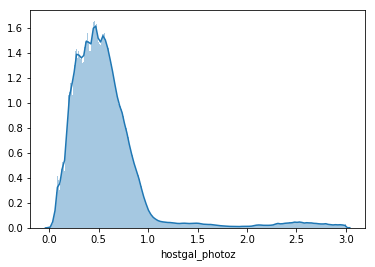

In [71]:
pos_t_rs = t['hostgal_photoz'][t['hostgal_photoz']>0]
pos_ta_rs = ta['hostgal_photoz'][ta['hostgal_photoz']>0]
tx, ty = sns.distplot(pos_t_rs, bins=np.linspace(0,3,300)).get_lines()[0].get_data()

/Users/miguelrita/anaconda2/envs/titanic/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


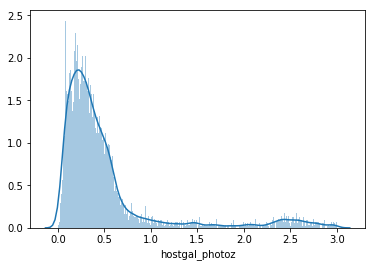

In [56]:
#sns.distplot(pos_t_rs, bins=np.linspace(0,3,300)).get_lines()
tax, tay = sns.distplot(pos_ta_rs, bins=np.linspace(0,3,300)).get_lines()[0].get_data()

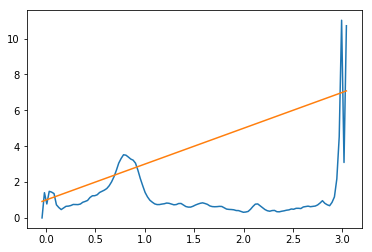

In [76]:
import matplotlib.pyplot as plt

h = sns.lineplot(tx, ty/tay)
h = sns.lineplot(tx, 1 + 2*tx)
#h.axes.set_xlim(0,1.2)
#h.axes.set_ylim(0,4.5)

dummy_rs = np.array([0,0.05,0.15,0.05,0.8,0.8,1,0.1])

np.interp(dummy_rs, tx, ty/tay)

np.save('../data/covariate_tx.npy', tx)
np.save('../data/covariate_ratio.npy', ty/tay)

In [99]:
import seaborn as sns

/home/lanfear/anaconda3/envs/tf_intro/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


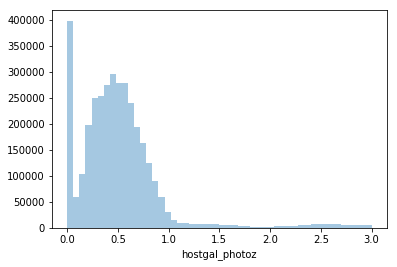

In [100]:
sns.distplot(t['hostgal_photoz'][t['hostgal_photoz']>-1].sort_values(ascending=True),kde=False, norm_hist=False)

In [71]:
cp = t['hostgal_photoz'].sort_values(ascending=True).cumsum()/t['hostgal_photoz'].sum()

In [101]:
import numpy as np

extragal_t = t['hostgal_photoz'].loc[t['hostgal_photoz']>0]
gal_t = t['hostgal_photoz'].loc[t['hostgal_photoz']==0]

# Number of q bins for extragalactic will be such as to have same cardinal. as galactic bin
q = np.ceil(extragal_t.count()/gal_t.count()).astype(int)

bins = pd.qcut(extragal_t, q=q)
res = bins.value_counts().sort_index().cumsum() / bins.value_counts().sort_index().sum()
res

(-0.00019999999999999998, 0.245]    0.125095
(0.245, 0.336]                      0.250007
(0.336, 0.423]                      0.375028
(0.423, 0.502]                      0.500090
(0.502, 0.585]                      0.625028
(0.585, 0.684]                      0.750057
(0.684, 0.834]                      0.875009
(0.834, 3.0]                        1.000000
Name: hostgal_photoz, dtype: float64

In [83]:
res.index[0]

Interval(-0.00019999999999999998, 0.245, closed='right')

In [75]:
t.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv'],
      dtype='object')